In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'y')

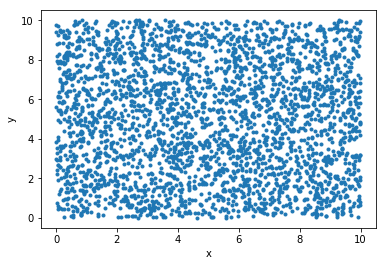

In [38]:
N=3000
ale_x=np.random.uniform(0.,10.,N)
ale_y=np.random.uniform(0.,10.,N)
plt.plot(ale_x,ale_y,'.')
plt.xlabel('x')
plt.ylabel('y')

In [39]:
circle_r = 25
circle_x = 5
circle_y = 5
phi = 2 * np.pi * np.random.rand(N)
r = circle_r * np.random.rand(N)

Text(0,0.5,'y')

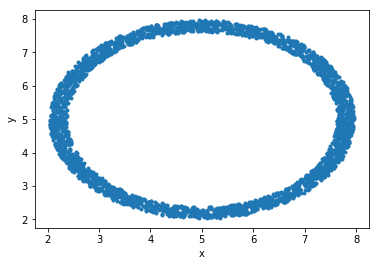

In [40]:
ranillo = 2*np.pi*np.random.uniform(1.1,1.4,N)
rani = np.sqrt(ranillo)#**(0.5)
w = rani * np.cos(phi) + circle_x
z = rani * np.sin(phi) + circle_y
plt.plot(w,z,'.')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

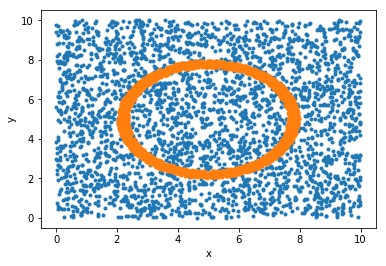

In [41]:
plt.plot(ale_x,ale_y,'.')
plt.plot(w,z,'.')
plt.xlabel('x')
plt.ylabel('y')

In [42]:
def distancia(x1,x2,y1,y2): # Aquí se define funcion que calcula las distancias
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d

In [43]:
Lmax = np.sqrt(2.)*10    #se construiran los bins para el histogrma
tbin = Lmax/50          #tamaño de los bins, número de bins = 20
nbin = np.linspace(0.,np.sqrt(2.)*10,50)  #Genera los bins

In [44]:
cont = np.zeros(50,dtype=int)      #arreglo de ceros del número de bins para datos,formado por enteros
cont_ran = np.zeros(50,dtype=int)  #arreglo de ceros del número de bins para aleatorios
w1 = 1      #Peso 1, en este caso asignado a x<5
w2 = 2      #Peso 2, en este caso asignado a x>5

In [45]:
for i in range(len(w)): # en esta funcion se calculan las distancias con los pesos correspondientes w1 y w2
    for j in range(i+1,len(w)):
        d_d = distancia(w[i],w[j],z[i],z[j])
        d_r = distancia(ale_x[i],ale_x[j],ale_y[i],ale_y[j])
        temp = int(d_d/tbin)#Toma el valor entero de la división
        temp_ran = int(d_r/tbin)
        cont_ran[temp_ran] +=1#añade 1 al bin correspondiente de la distancia
        if (w[i]>5.):
            cont[temp] += w2*1#añade 1 al bin correspondiente a esa distancia con un peso w2
        else:
            cont[temp] += w1*1#añade 1 al bin correspondiente a esa distancia con un peso w1
        if(w[j]>5.):
            cont[temp] += w2*1
        else:
            cont[temp] += w1*1

Text(0,0.5,'número de distancias (datos)')

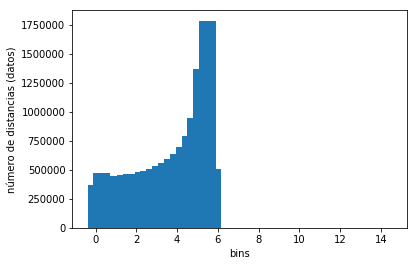

In [46]:
plt.bar(nbin,cont)
plt.xlabel('bins')
plt.ylabel('número de distancias (datos)')

Text(0,0.5,'número de distancias (aleatorios)')

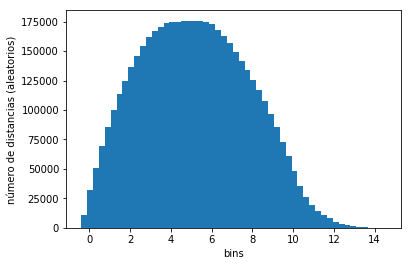

In [47]:
plt.bar(nbin,cont_ran)
plt.xlabel('bins')
plt.ylabel('número de distancias (aleatorios)')

In [48]:
cont_dr = np.zeros(50,dtype=int) # aquí se cuentan las distancias entre los datos y los aleatorios

In [49]:
for i in range(len(w)):
    for j in range(len(w)):
        d_dr = distancia(w[i],ale_x[j],z[i],ale_y[j])
        temp_dr = int(d_dr/tbin)
        if (w[i]>5.):
            cont_dr[temp_dr] += w2*1
        else:
            cont_dr[temp_dr] += w1*1
        if(w[j]>5.):
            cont_dr[temp_dr] += w2*1
        else:
            cont_dr[temp_dr] += w1*1

Text(0,0.5,'número de distancias (datos y aleatorios)')

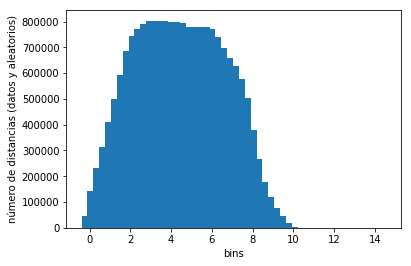

In [34]:
plt.bar(nbin,cont_dr)
plt.xlabel('bins')
plt.ylabel('número de distancias (datos y aleatorios)')

/home/rodrigo/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


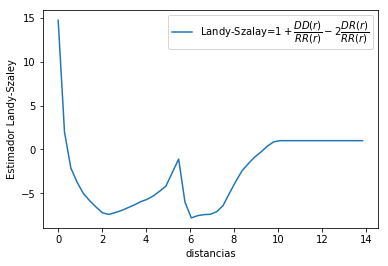

In [36]:
plt.plot(nbin,1.+ cont/cont_ran -2*cont_dr/cont_ran, label=('Landy-Szalay=$1+\dfrac{DD(r)}{RR(r)}-2\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('distancias')
plt.ylabel('Estimador Landy-Szaley')
plt.legend()